#Chapter 4 - Introduction to TensorFlow 2.0

### 4.2 Neural Network in TensorFlow for Classification - Single Output

#### Importing Required Libraries

In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
banknote_data = pd.read_csv("https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv")

In [5]:
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
banknote_data.shape

(1372, 5)

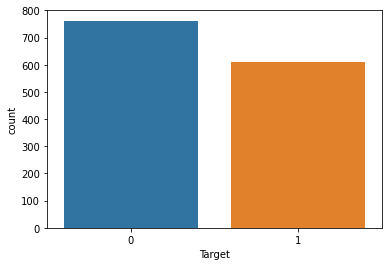

In [7]:
sns.countplot(x='Target', data=banknote_data)

In [8]:
X = banknote_data.drop(['Target'], axis=1).values
y = banknote_data[['Target']].values

print(X.shape)
print(y.shape)

(1372, 4)
(1372, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
def create_model(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [0]:
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

In [0]:
model = create_model(learn_rate, dropout_rate)

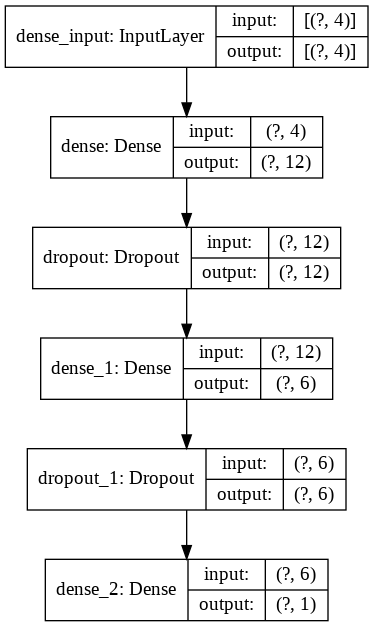

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [15]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 877 samples, validate on 220 samples
Epoch 1/20
877/877 [==============================] - 2s 2ms/sample - loss: 0.5551 - accuracy: 0.7263 - val_loss: 0.4209 - val_accuracy: 0.8955
Epoch 2/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.3482 - accuracy: 0.8997 - val_loss: 0.2274 - val_accuracy: 0.9591
Epoch 3/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.2157 - accuracy: 0.9384 - val_loss: 0.1165 - val_accuracy: 0.9773
Epoch 4/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.1440 - accuracy: 0.9487 - val_loss: 0.0664 - val_accuracy: 0.9864
Epoch 5/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.0912 - accuracy: 0.9681 - val_loss: 0.0418 - val_accuracy: 0.9955
Epoch 6/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.0733 - accuracy: 0.9738 - val_loss: 0.0313 - val_accuracy: 0.9955
Epoch 7/20
877/877 [==============================] - 1s 1ms/sample - loss: 0.0660 - accur

In [16]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])

275/275 [==============================] - 0s 374us/sample - loss: 0.0040 - accuracy: 1.0000
Test Score: 0.00397354013286531
Test Accuracy: 1.0


In [17]:
history_dict = model_history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


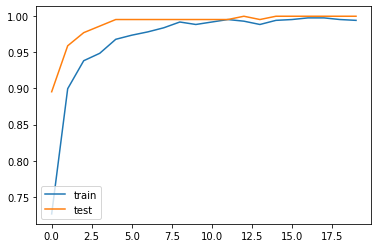

In [18]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')


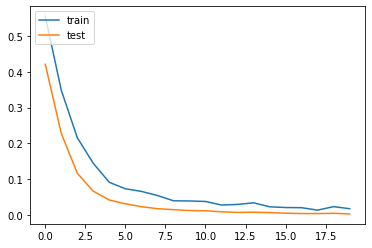

In [19]:

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

### 4.3 Neural Network in TensorFlow for Classification - Muliple Outputs

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = iris_data.drop(['species'], axis=1)
y = pd.get_dummies(iris_data.species, prefix='output')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
X = X.values
y = y.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
def create_model_multiple_outs(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [0]:
dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

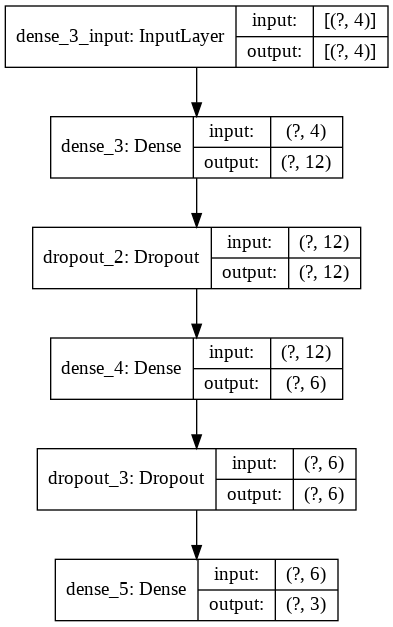

In [29]:
model = create_model_multiple_outs(learn_rate, dropout_rate)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [30]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 1s 8ms/sample - loss: 1.3624 - accuracy: 0.1875 - val_loss: 1.1886 - val_accuracy: 0.3333
Epoch 2/50
96/96 [==============================] - 0s 4ms/sample - loss: 1.0811 - accuracy: 0.4062 - val_loss: 0.9926 - val_accuracy: 0.4583
Epoch 3/50
96/96 [==============================] - 0s 5ms/sample - loss: 0.8822 - accuracy: 0.5833 - val_loss: 0.8020 - val_accuracy: 0.9167
Epoch 4/50
96/96 [==============================] - 0s 4ms/sample - loss: 0.6905 - accuracy: 0.6875 - val_loss: 0.6391 - val_accuracy: 0.8750
Epoch 5/50
96/96 [==============================] - 0s 4ms/sample - loss: 0.6038 - accuracy: 0.6875 - val_loss: 0.5482 - val_accuracy: 0.8333
Epoch 6/50
96/96 [==============================] - 0s 4ms/sample - loss: 0.5842 - accuracy: 0.7188 - val_loss: 0.4914 - val_accuracy: 0.8750
Epoch 7/50
96/96 [==============================] - 0s 4ms/sample - loss: 0.4806 - accuracy: 0.7812 - va

In [31]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])

30/30 [==============================] - 0s 3ms/sample - loss: 0.0560 - accuracy: 1.0000
Test Score: 0.0560462586581707
Test Accuracy: 1.0


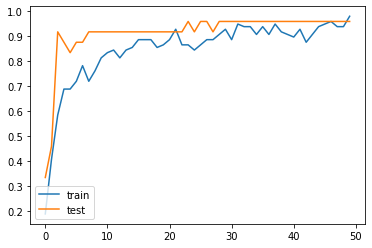

In [32]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

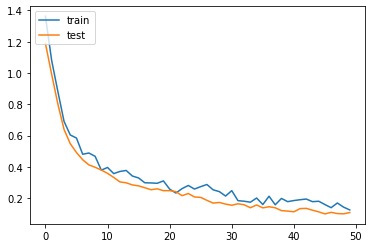

In [33]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

### 4.4 Neural Network in TensorFlow for Regression 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
wine_quality = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-white.csv", sep=';')

In [37]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
X = wine_quality.drop(['quality'], axis=1).values
y = wine_quality[['quality']].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
def create_model_regression(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(25,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

In [0]:
dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

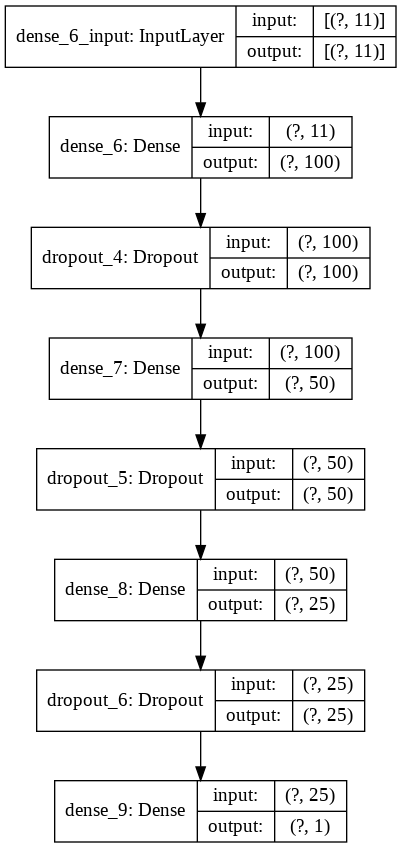

In [48]:
model = create_model_regression(learn_rate, dropout_rate)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [49]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 3134 samples, validate on 784 samples
Epoch 1/50
3134/3134 [==============================] - 11s 4ms/sample - loss: 2.4518 - mae: 1.1747 - val_loss: 1.1983 - val_mae: 0.8978
Epoch 2/50
3134/3134 [==============================] - 11s 3ms/sample - loss: 1.0767 - mae: 0.8182 - val_loss: 0.6705 - val_mae: 0.6335
Epoch 3/50
3134/3134 [==============================] - 11s 4ms/sample - loss: 0.9546 - mae: 0.7678 - val_loss: 0.8133 - val_mae: 0.7067
Epoch 4/50
3134/3134 [==============================] - 11s 3ms/sample - loss: 0.8194 - mae: 0.7123 - val_loss: 0.5951 - val_mae: 0.5881
Epoch 5/50
3134/3134 [==============================] - 11s 3ms/sample - loss: 0.7811 - mae: 0.6961 - val_loss: 0.5355 - val_mae: 0.5622
Epoch 6/50
3134/3134 [==============================] - 11s 3ms/sample - loss: 0.7174 - mae: 0.6638 - val_loss: 0.5474 - val_mae: 0.5618
Epoch 7/50
3134/3134 [==============================] - 11s 4ms/sample - loss: 0.6809 - mae: 0.6454 - val_loss: 0.5787 - val_mae: 0

In [50]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])

980/980 [==============================] - 0s 169us/sample - loss: 0.5045 - mae: 0.5312
Test Score: 0.5045385690367952
Test Accuracy: 0.53124046


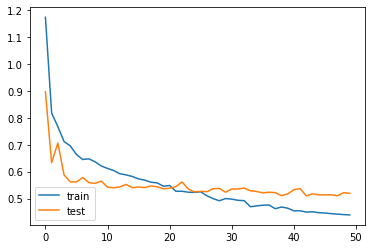

In [52]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['mae'], label = 'mae')
plt.plot(model_history.history['val_mae'], label = 'val_mae')
plt.legend(['train','test'], loc='lower left')

### Exercise 4.1

#### Question 1:

Which of the following loss functions can be used for regression problems:

1. Binary Cross Entropy
2. Categorical Cross Entropy
3. Log Likelihood
4. None of the Above

Answer (4)


#### Question 2:

We say that a model is overfitting when:

1. Results on test set are better than train set
2. Results on both test and train set are similar
3. Results on training set are better than results on test set
4. None of the above

Answer (3)

#### Question 3:

The number of neurons in the output layer depends upon:

1. The type of problem
2. The number of possible  outputs
3. The activation function
4. The loss function

Answer (2)

### Exercise 4.2

In [71]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

diamond_data = sns.load_dataset('diamonds')

diamond_data .head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


From the diamond dataset above, predict the price of diamond using all the other features. 
Tip: Use one-hot encoding to convert categorical variables into numerical variables.

In [72]:
diamond_data.shape
categorical_data = diamond_data.drop(['cut','color', 'clarity'], axis=1)

cut_1hot = pd.get_dummies(diamond_data.cut).iloc[:,1:]
color_1hot = pd.get_dummies(diamond_data.color).iloc[:,1:]
clarity_1hot = pd.get_dummies(diamond_data.clarity).iloc[:,1:]

diamond_data = pd.concat([categorical_data,cut_1hot, color_1hot,clarity_1hot], axis=1)

X = diamond_data.drop(['price'], axis=1).values

y = diamond_data['price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


def create_model(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(25,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

  
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

model = create_model(learn_rate, dropout_rate)

model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test MAE:", accuracies[1])

Train on 34521 samples, validate on 8631 samples
Epoch 1/20
34521/34521 [==============================] - 39s 1ms/sample - loss: 2284695.5054 - mae: 747.4974 - val_loss: 2096866.7675 - val_mae: 462.8856
Epoch 2/20
34521/34521 [==============================] - 38s 1ms/sample - loss: 1030681.7564 - mae: 555.9938 - val_loss: 2252981.0494 - val_mae: 435.2428
Epoch 3/20
34521/34521 [==============================] - 38s 1ms/sample - loss: 945063.9646 - mae: 539.1994 - val_loss: 2743844.2677 - val_mae: 403.4655
Epoch 4/20
34521/34521 [==============================] - 38s 1ms/sample - loss: 926084.1948 - mae: 531.4434 - val_loss: 3352591.9939 - val_mae: 410.1997
Epoch 5/20
34521/34521 [==============================] - 38s 1ms/sample - loss: 893698.9366 - mae: 522.5873 - val_loss: 3640072.1163 - val_mae: 402.7003
Epoch 6/20
34521/34521 [==============================] - 38s 1ms/sample - loss: 884912.2597 - mae: 523.2234 - val_loss: 3888763.9429 - val_mae: 385.7899
Epoch 7/20
34521/34521 [=